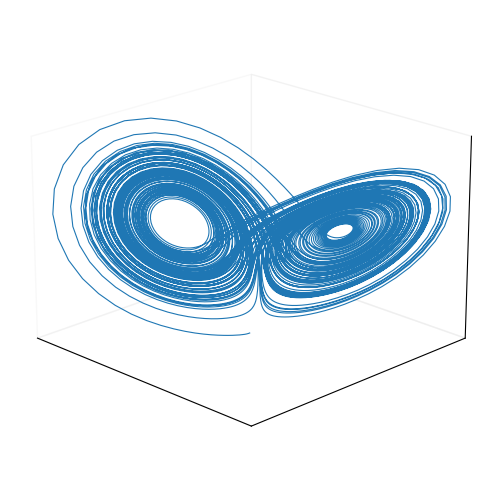

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D, art3d

# Lorenz system
def lorenz(t, s, sigma=10, rho=28, beta=8/3):
    x, y, z = s
    return [sigma*(y - x), x*(rho - z) - y, x*y - beta*z]

# Integration
t = np.linspace(0, 130, 10000)
sol = solve_ivp(lorenz, (t[0], t[-1]), [1, 1, 1], t_eval=t)

# Limits
xlim = (sol.y[0].min(), sol.y[0].max())
ylim = (sol.y[1].min(), sol.y[1].max())
zlim = (sol.y[2].min(), sol.y[2].max())

# Plot
fig = plt.figure(figsize=(6, 5), facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=90, azim=-90)

# Plot Lorenz in black
ax.plot(sol.y[0], sol.y[1], sol.y[2], color='#1f77b4', linewidth=0.8)

# Remove all ticks, labels, panes
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)
ax.set_frame_on(False)

# Set 3D limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)


# Set view from the back
ax.view_init(elev=20, azim=135)
ax.set_box_aspect([1,1,0.7])
plt.tight_layout()
plt.savefig("Lorenz63.pdf", format='pdf', bbox_inches='tight')

plt.show()



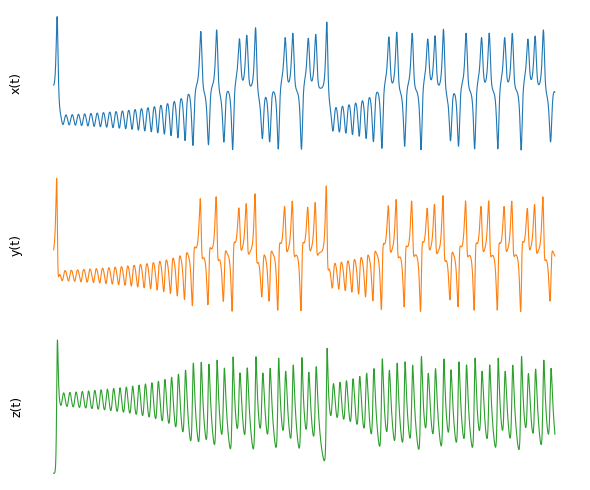

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Lorenz system
def lorenz(t, s, sigma=10, rho=28, beta=8/3):
    x, y, z = s
    return [sigma*(y - x), x*(rho - z) - y, x*y - beta*z]

# Integration
t = np.linspace(0, 50, 5000)
sol = solve_ivp(lorenz, (t[0], t[-1]), [1, 1, 1], t_eval=t)

x, y, z = sol.y

# Plot
fig, axs = plt.subplots(3, 1, figsize=(6, 5), sharex=True)
fig.subplots_adjust(hspace=0.2)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
labels = ['x(t)', 'y(t)', 'z(t)']

for i, (data, ax, label, color) in enumerate(zip([x, y, z], axs, labels, colors)):
    ax.plot(t, data, color=color, linewidth=0.8)
    ax.set_ylabel(label, fontsize=9)
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_yticks([])
    ax.set_xticks([])

axs[-1].set_xticks([])

# Remove frame
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig("Lorenz63_timeseries.pdf", format='pdf', bbox_inches='tight')
plt.show()


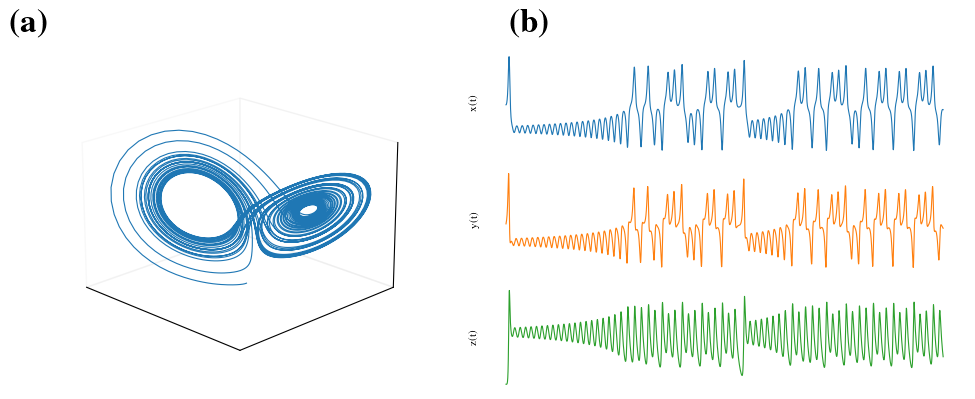

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

# Lorenz system
def lorenz(t, s, sigma=10, rho=28, beta=8/3):
    x, y, z = s
    return [sigma*(y - x), x*(rho - z) - y, x*y - beta*z]

# Integration
t = np.linspace(0, 50, 5000)
sol = solve_ivp(lorenz, (t[0], t[-1]), [1, 1, 1], t_eval=t)
x, y, z = sol.y

# Plot setup: 1 row, 2 columns
fig = plt.figure(figsize=(10, 4), facecolor='white')

# --- Col 1: Lorenz attractor
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot(x, y, z, color='#1f77b4', linewidth=0.8)

# Minimalist settings
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_zlabel("")
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.grid(False)
ax1.set_frame_on(False)
ax1.view_init(elev=20, azim=135)
ax1.set_box_aspect([1,1,0.7])

# --- Col 2: time series
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
labels = ['x(t)', 'y(t)', 'z(t)']

for i, (data, label, color) in enumerate(zip([x, y, z], labels, colors)):
    ax = fig.add_subplot(3, 2, 2 + i * 2)  # Placer dans la 2e colonne
    ax.plot(t, data, color=color, linewidth=0.8)
    ax.set_ylabel(label, fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)
fig.text(0.03, 0.93, r'\textbf{(a)}', fontsize=24)
fig.text(0.53, 0.93, r'\textbf{(b)}', fontsize=24)



plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig("Lorenz63_combined.pdf", format='pdf', bbox_inches='tight')
plt.show()


/var/folders/jw/8f16x6dd6zl6gsvq6pfgpw7w0000gn/T/ipykernel_79164/1633081551.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


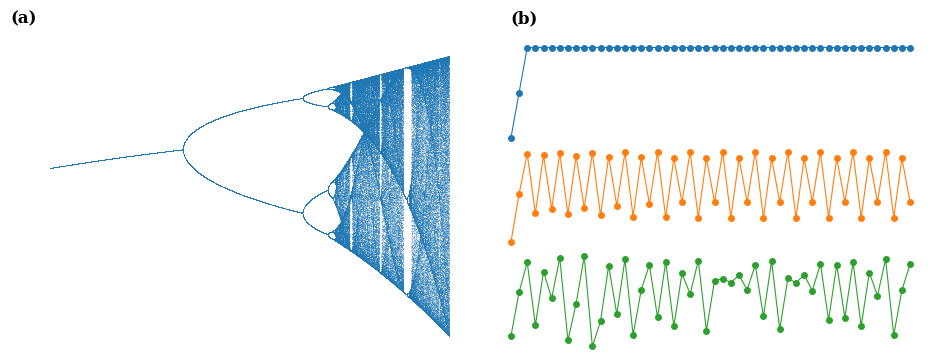

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Colors matching Lorenz figure
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Logistic map definition
def logistic_map(r, x):
    return r * x * (1 - x)

# Parameters for time series
r_values = [2.5, 3.5, 3.9]
n_ts = 50
x0 = 0.2
time = np.arange(n_ts)

# Compute time series
ts_data = []
for r in r_values:
    x = np.empty(n_ts)
    x[0] = x0
    for i in range(1, n_ts):
        x[i] = logistic_map(r, x[i-1])
    ts_data.append(x)

# Compute bifurcation diagram data
r_bif = np.linspace(2.5, 4.0, 5000)
n_iter = 1000
last = 100
x_bif = np.full_like(r_bif, x0)
bif_r, bif_x = [], []

for i in range(n_iter):
    x_bif = logistic_map(r_bif, x_bif)
    if i >= (n_iter - last):
        bif_r.append(r_bif.copy())
        bif_x.append(x_bif.copy())

bif_r = np.concatenate(bif_r)
bif_x = np.concatenate(bif_x)

# Plot setup using GridSpec
fig = plt.figure(figsize=(10, 4), facecolor='white')
gs = fig.add_gridspec(3, 2, width_ratios=[1, 1], wspace=0.05, hspace=0.05)

# (a) Bifurcation diagram on left spanning all rows
ax_bif = fig.add_subplot(gs[:, 0])
ax_bif.plot(bif_r, bif_x, ',', color=colors[0], alpha=0.3)
ax_bif.set_xticks([])
ax_bif.set_yticks([])
ax_bif.set_frame_on(False)

# (b) Time series on right, three stacked plots with round markers
for i in range(3):
    ax_ts = fig.add_subplot(gs[i, 1])
    ax_ts.plot(time, ts_data[i], color=colors[i], linewidth=0.8, marker='o', markersize=4, linestyle='-')
    ax_ts.set_xticks([])
    ax_ts.set_yticks([])
    ax_ts.set_frame_on(False)

# Add panel labels
fig.text(0.03, 0.93, '(a)', fontsize=12, fontweight='bold')
fig.text(0.53, 0.93, '(b)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.88, left=0.05, right=0.95)
plt.savefig("LogisticMap_combined_with_markers.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [4]:
from manim import *
import numpy as np

# Simulation of ESN performance surface (for illustration)
def performance(input_scaling, spectral_radius):
    # Example synthetic function: a smooth 2D bowl with a shifted minimum
    return (input_scaling - 0.6)**2 + (spectral_radius - 0.8)**2 + 0.1 * np.sin(5 * input_scaling) * np.sin(5 * spectral_radius)

class ESNGridSearch2D(Scene):
    def construct(self):
        # Define parameter ranges
        inp_range = np.linspace(0.0, 1.0, 10)
        spec_range = np.linspace(0.0, 1.0, 10)

        # Create axes
        axes = Axes(
            x_range=[0, 1, 0.2],
            y_range=[0, 1, 0.2],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
        ).to_edge(DOWN)
        axes_labels = axes.get_axis_labels(x_label="Input Scaling", y_label="Spectral Radius")
        self.play(Create(axes), Write(axes_labels))

        # Compute grid of performance values
        grid_points = []
        performances = []
        for xi, x in enumerate(inp_range):
            for yi, y in enumerate(spec_range):
                perf = performance(x, y)
                performances.append((perf, x, y))
                dot = Dot(
                    axes.coords_to_point(x, y), radius=0.1,
                    color=GREY
                )
                grid_points.append((dot, perf))

        # Initial scatter
        self.play(LaggedStartMap(FadeIn, [gp[0] for gp in grid_points], lag_ratio=0.05))

        # Animate grid search: color each dot by performance
        best_perf = float('inf')
        best_dot = None
        for dot, perf in grid_points:
            # determine color intensity: low perf -> green, high -> red
            # map performance to [0,1]
            norm = (perf - min([p for p, *_ in performances])) / (max([p for p, *_ in performances]) - min([p for p, *_ in performances]))
            color = interpolate_color(GREEN, RED, norm)
            # highlight current dot
            self.play(dot.animate.set_color(color).scale(1.3), run_time=0.1)
            self.play(dot.animate.scale(1/1.3), run_time=0.1)

            # update best
            if perf < best_perf:
                best_perf = perf
                if best_dot:
                    # reset old best
                    self.play(best_dot.animate.set_stroke(width=0), run_time=0.1)
                best_dot = dot
                # highlight new best with a golden stroke
                self.play(best_dot.animate.set_stroke(YELLOW, 4), run_time=0.2)

        # Final emphasis on best
        best_label = MathTex(f"(x^* , y^*) = ({round(axes.x_axis.p2c(best_dot.get_center())[0],2)} , {round(axes.y_axis.p2c(best_dot.get_center())[1],2)})")
        best_label.next_to(axes, UP)
        self.play(Write(best_label), run_time=1)
        self.wait(2)


ImportError: cannot import name 'TypeIs' from 'typing_extensions' (/opt/homebrew/anaconda3/lib/python3.11/site-packages/typing_extensions.py)